# Logistic Regression on MNIST dataset

## Implemented Logistic Regression for Binary Classification and Multinomail Classification 



In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import random
from sklearn.model_selection import train_test_split

# Logistic Regression Classifier for Binary Classification
# Classifies whether a number is 8 or 9

In [2]:
import matplotlib.pylab as plt
%matplotlib inline
import pickle, gzip       
import numpy as np

class Numbers:
    """
    Class to store MNIST data for images of 9 and 8 only
    """ 
    def __init__(self, location):
        # You shouldn't have to modify this class, but you can if you'd like
        # Load the dataset
        with gzip.open(location, 'rb') as f:
            train_set, valid_set, test_set = pickle.load(f)
         
        self.train_x, self.train_y = train_set
        train_indices = np.where(self.train_y > 7)
        self.train_x, self.train_y = self.train_x[train_indices], self.train_y[train_indices]
        self.train_y = self.train_y - 8
        
        self.valid_x, self.valid_y = valid_set
        valid_indices = np.where(self.valid_y > 7)
        self.valid_x, self.valid_y = self.valid_x[valid_indices], self.valid_y[valid_indices]
        self.valid_y = self.valid_y - 8

In [3]:
data = Numbers('./mnist.pklz')

In [4]:
from collections import defaultdict
class LogReg:
    
    def __init__(self, X, y, eta = 0.1):
        """
        Create a logistic regression classifier
        :param num_features: The number of features (including bias)
        :param eta: Learning rate (the default is a constant value)
        :method: This should be the name of the method (sgd_update or mini_batch_descent)
        :batch_size: optional argument that is needed only in the case of mini_batch_descent
        """
        self.X = X
        self.y = y
        self.w = np.zeros(X.shape[1])
        self.eta = eta
        
    def calculate_score(self, x):
        """
        :param x: This can be a single training example or it could be n training examples
        :return score: Calculate the score (dot product of the weights with the input parameter) 
        that you will plug into the sigmoid function
        """
        
        score = np.dot(x, self.w)
        return score
    
    def sigmoid(self, score):
        """
        :param score: Either a real valued number or a vector to convert into a number between 0 and 1
        :return sigmoid_value: Calcuate the output of applying the sigmoid function to the score. This could be a single
        value or a vector depending on the input
        """
        
        epsilon = 0.0000001
        sigmoid_value = 1.0/(1 + epsilon + np.exp(-score)) 
        return sigmoid_value
    
    def compute_gradient(self, x, h, y):
        """
        :param x: Feature vector
        :param h: predicted class label
        :param y: real class label
        :return gradient: Return the derivate of the cost w.r.t to the weights
        """
        
        gradient = np.dot((h-y),x)
        return gradient
     
    def sgd_update(self):
        """
        Compute a stochastic gradient update on single training example at a time from the entire dataset 
        and update weights accordingly to improve the log likelihood.
        :param x_i: The features of the example to take the gradient with respect to
        :param y: The target output of the example to take the gradient with respect to
        :return: Return the new value of the regression coefficients
        """ 
        # TODO: Finish this function to do a stochastic gradient descent update over the entire dataset
        # and return the updated weight vector
        score, sigmoid_val, gradient = 0, 0, 0
        for i in range(len(self.X)):
            score = self.calculate_score(self.X[i])
            sigmoid_val = self.sigmoid(score)
            gradient = self.compute_gradient(self.X[i], sigmoid_val, self.y[i])
            self.w = self.w - (self.eta*gradient)
        return self.w
    
    
    def mini_batch_update(self, batch_size):
        """
        Performs mini-batch gradient descent on the batches of the training data set example 
        and updates the weight vector correspondingly
        :param X: NumPy array of features (size : no of examples X features)
        :param y: Numpy array of class labels (size : no of examples X 1)
        :param batch_size: size of the batch for gradient update
        :returns w: Coefficients of the classifier (after updating)
        """
        
        X_batch_list = list()
        y_batch_list = list()
        

        for i in range(len(self.y) // batch_size):
            X_batch_list.append(self.X[i * batch_size : i * batch_size + batch_size, :])
            y_batch_list.append(self.y[i * batch_size : i * batch_size + batch_size])
    
        if len(self.y) % batch_size > 0:
            X_batch_list.append(self.X[len(self.y) // batch_size * batch_size:, :])
            y_batch_list.append(self.y[len(self.y) // batch_size * batch_size:])

        n = len(y_batch_list)
        
        for i in range(n):
            score = self.calculate_score(X_batch_list[i])
            sigmoid_val = self.sigmoid(score)
            gradient = self.compute_gradient(X_batch_list[i], sigmoid_val, y_batch_list[i])
            self.w = self.w - (self.eta*gradient)
        return self.w
    
    
    def progress(self, test_x, test_y, update_method = None, *batch_size):
        """
        Given a set of examples, computes the probability and accuracy
        :param test_x: The features of the test dataset to score
        :param test_y: The features of the test 
        :param update_method: The update method to be used, either 'sgd_update' or 'mini_batch_update'
        :param batch_size: Optional arguement to be given only in case of mini_batch_update
        :return: A tuple of (log probability, accuracy)
        """
        
        logprob, accuracy = 0.0, 0
        num_of_correct = 0
        
        if update_method == "sgd_update":
            weights = self.sgd_update()
            
        if update_method == "mini_batch_update":
            batch_size = int(''.join(map(str,batch_size)))
            weights = self.mini_batch_update(batch_size)
            
        for i in range(len(test_y)):
            sigmoid_val = self.sigmoid(self.calculate_score(test_x[i]))
            if test_y[i] == 1:
                logprob += np.log(sigmoid_val)
            else:
                logprob += np.log(1.000001 - sigmoid_val)
            
            if abs(test_y[i] - sigmoid_val) <= 0.49:
                num_of_correct += 1
        accuracy = float(num_of_correct) / float(len(test_y))
    
        return logprob, accuracy


In [5]:
import unittest

class LogRegTester(unittest.TestCase):
    def setUp(self):
        self.X = np.array([[0.1, 0.3 ], [0.4, 0.6], [0.8, 0.1], [0.8, 0.1], [0.5, 0.8]])
        self.y = np.array([0,  0, 1, 1,  0])
        self.log_reg_classifier_1 = LogReg(self.X, self.y, 0.5)
        self.log_reg_classifier_2 = LogReg(self.X, self.y, 0.5)
        
    def test_sgd_update(self):
        """
        Test sgd_update function from LogReg
        """
        weights = self.log_reg_classifier_1.sgd_update()
        self.assertEqual(round(weights[0], 2), 0.16)
        self.assertEqual(round(weights[1], 2), -0.37)
        
    def tests_mini_batch_update(self):
        """
        Test mini_batch_update function from LogReg
        """
        weights = self.log_reg_classifier_2.mini_batch_update(2)
        self.assertEqual(round(weights[0], 2), 0.17)
        self.assertEqual(round(weights[1], 2), -0.37)
        
    def tests_progress_sgd_update(self):
        """
        Test progress function from LogReg with method = 'sgd_update'
        """
        self.log_reg_classifier_1 = LogReg(self.X[:4], self.y[:4], 0.5)
        log_prob, accuracy = self.log_reg_classifier_1.progress(self.X[4:], self.y[4:], 'sgd_update')
        self.assertEqual(round(log_prob, 1), -0.7)  # Changed to round 1.
        self.assertEqual(accuracy, 0)
        
        
    
    #BEGIN Workspace
    #Add more test functions as required
    #HINT - You'll want to make sure your
    #END Workspace
    
tests = LogRegTester()
myTests = unittest.TestLoader().loadTestsFromModule(tests)
unittest.TextTestRunner().run(myTests)

...
----------------------------------------------------------------------
Ran 3 tests in 0.004s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

Performing stochastic gradient descent for 10 epochs and five different values of eta range [.0001, .01, .1, .5, 1] and plotting the accuracy on training sets and validation set

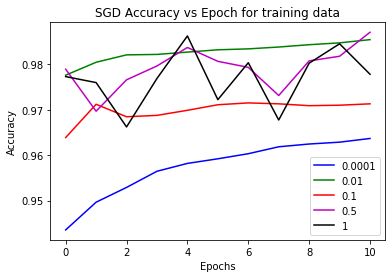

In [6]:
epochs = 11
lr_range = [.0001, .01, .1, .5, 1]
logprob, accuracy = [[] for j in range(len(lr_range))], [[] for j in range(len(lr_range))]

for j in range(len(lr_range)):
    indices = np.arange(data.train_x.shape[0])
    np.random.shuffle(indices)

    data.train_x = data.train_x[indices]
    data.train_y = data.train_y[indices]       
    classifier = LogReg(data.train_x, data.train_y, lr_range[j])
    for i in range(epochs):
        prob, acc = classifier.progress(data.train_x, data.train_y,'sgd_update')
        logprob[j].append(prob)
        accuracy[j].append(acc)
epoch = []
for i in range(epochs):
    epoch.append(i)
    
a,b,c,d,e = accuracy[0],accuracy[1],accuracy[2],accuracy[3],accuracy[4]
plt.plot(epoch, a, 'b-', label="0.0001")
plt.plot(epoch, b, 'g-', label="0.01")
plt.plot(epoch, c, 'r-', label="0.1")
plt.plot(epoch, d, 'm-', label="0.5")
plt.plot(epoch, e, 'k-', label="1")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("SGD Accuracy vs Epoch for training data")
plt.legend()

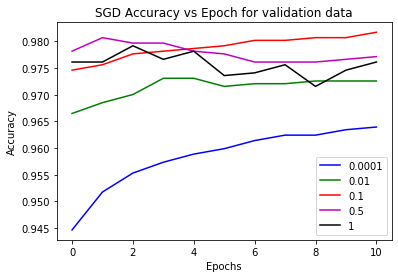

In [7]:
epochs = 11
lr_range = [0.0001, 0.001, 0.01, 0.1, 0.2]
logprob, accuracy = [[] for j in range(len(lr_range))], [[] for j in range(len(lr_range))]
for j in range(len(lr_range)):
    classifier = LogReg(data.train_x, data.train_y, lr_range[j])
    for i in range(epochs):
        prob, acc = classifier.progress(data.valid_x, data.valid_y,'sgd_update')
        logprob[j].append(prob)
        accuracy[j].append(acc)

epoch = []
for i in range(epochs):
    epoch.append(i)
    
a,b,c,d,e = accuracy[0],accuracy[1],accuracy[2],accuracy[3],accuracy[4]
plt.plot(epoch, a, 'b-', label="0.0001")
plt.plot(epoch, b, 'g-', label="0.01")
plt.plot(epoch, c, 'r-', label="0.1")
plt.plot(epoch, d, 'm-', label="0.5")
plt.plot(epoch, e, 'k-', label="1")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("SGD Accuracy vs Epoch for validation data")
plt.legend()

Performing mini batch gradient descent for 10 epochs and five different values of eta range [.0001, .01, .1, .5, 1] and plotting the accuracy on training sets and validation set

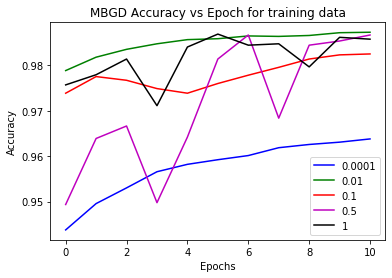

In [8]:
epochs = 11
lr_range = [.0001, .01, .1, .5, 1]
logprob, accuracy = [[] for j in range(len(lr_range))], [[] for j in range(len(lr_range))]
batch_size = 10
for j in range(len(lr_range)):
    indices = np.arange(data.train_x.shape[0])
    np.random.shuffle(indices)

    data.train_x = data.train_x[indices]
    data.train_y = data.train_y[indices]
    classifier = LogReg(data.train_x, data.train_y, lr_range[j])
    for i in range(epochs):
        prob, acc = classifier.progress(data.train_x, data.train_y,'mini_batch_update', batch_size)
        logprob[j].append(prob)
        accuracy[j].append(acc)

epoch = []
for i in range(epochs):
    epoch.append(i)
    
a,b,c,d,e = accuracy[0],accuracy[1],accuracy[2],accuracy[3],accuracy[4]
plt.plot(epoch, a, 'b-', label="0.0001")
plt.plot(epoch, b, 'g-', label="0.01")
plt.plot(epoch, c, 'r-', label="0.1")
plt.plot(epoch, d, 'm-', label="0.5")
plt.plot(epoch, e, 'k-', label="1")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("MBGD Accuracy vs Epoch for training data")
plt.legend()

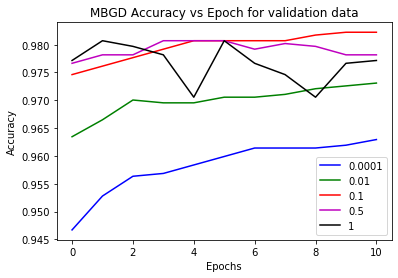

In [9]:
epochs = 11
lr_range = [0.0001, 0.001, 0.01, 0.1, 0.2]
logprob, accuracy = [[] for j in range(len(lr_range))], [[] for j in range(len(lr_range))]
batch_size = 10
for j in range(len(lr_range)):
    classifier = LogReg(data.train_x, data.train_y, lr_range[j])
    for i in range(epochs):
        prob, acc = classifier.progress(data.valid_x, data.valid_y,'mini_batch_update', batch_size)
        logprob[j].append(prob)
        accuracy[j].append(acc)
epoch = []
for i in range(epochs):
    epoch.append(i)
    
a,b,c,d,e = accuracy[0],accuracy[1],accuracy[2],accuracy[3],accuracy[4]
plt.plot(epoch, a, 'b-', label="0.0001")
plt.plot(epoch, b, 'g-', label="0.01")
plt.plot(epoch, c, 'r-', label="0.1")
plt.plot(epoch, d, 'm-', label="0.5")
plt.plot(epoch, e, 'k-', label="1")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("MBGD Accuracy vs Epoch for validation data")
plt.legend()

**Role of learning rate (eta) on the efficiency of convergence during training**

Learning rate is a hyperparameter which helps us control the weight adjustments of the model based on the gradient. 

Higher training rate coverges quickly at first, but gets noisy and might miss a local minima or sometimes never converge. whereas lower learning rate takes longer time to converge, but it doesn't miss any local minima. Take the learning rate of 0.0001, we can see that the accuracy getting increased slowly. If we train for more epochs for that learning rate, it will slowly reach the accuracy of the other learning rates. Therefore, our learning rate shouldn't be too high or to low.

**Role of the number of epochs on validation accuracy**

With a right learning rate (not too small, not too large), the accuracy on the validation set increases steadily as the number of epochs increase. If thr learning rate is either too small or too large, then the accuracy always goes through going up and down and doesn't show steady increase. This trend continues for as the epochs increase, untill it reaches the point of overfitting.

### Implementing the Logistic Regression Classifier for Multinomial Classification

Here we will implementing **One Vs All** or **One Vs Rest** classification. We classify all the digits (0-9) in the MNIST dataset


In [10]:
class Numbers2:
    """
    Class to store MNIST data for images of 0-9
    """ 
    def __init__(self, location):
        # Load the dataset
        with gzip.open(location, 'rb') as f:
            train_set, valid_set, test_set = pickle.load(f)
 
        self.train_x, self.train_y = train_set
        self.test_x, self.test_y = valid_set

[5 0 4 1 9 2 1 3 1 4]
true label: 6


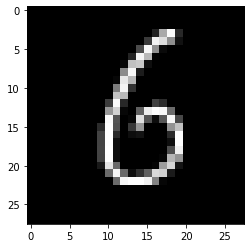

In [11]:
data2 = Numbers2('./mnist.pklz')
print(data2.train_y[:10])
def view_digit(example, label=None):
    if label is not None: print("true label: {:d}".format(label))
    plt.imshow(example.reshape(28,28), cmap='gray');
view_digit(data2.train_x[18],data2.train_y[18])

In [12]:
from sklearn import preprocessing
class MultiLogReg:
    
    def __init__(self, X, y, eta = 0.1):
        self.X = X
        self.y = self.one_hot_encoding(y)
        self.eta = eta
        self.classes = []
        
    def one_hot_encoding(self, y):
        """Represent the output vector y as a one hot encoding. Create a matrix of dimensions (m X 10) 
        where m = number of examples, and 10 for number of classes 
        if the class for the ith example is 7, then y[i][7] = 1 and the for k != 7, y[i][k] = 0"""
        
        encoding = [[0 for i in range(10)] for j in range(len(y))]
        for i in range(len(y)):
            encoding[i][y[i]] = 1
        encoding = np.array(encoding)
        return encoding
        
    def get_optimal_parameters(self):
        """This is the main training loop. You will have to find the optimal weights for all 10 models
        Each model is fit to it's class which is (0-9), and the cost function will be against all of the other 
        numbers the rest"""
        
        num_class = 10
        print("Number \t epoch \t accuracy")
        for i in range(num_class):
            self.classes.append(LogReg(self.X, self.y, 0.01))
            lastaccuracy, last2accuracy = 0, 0
            for epoch in range(100):
                xtrain, xtest, ytrain, ytest = train_test_split(self.X, self.y[:,i], train_size = 0.8)
                self.classes[i].X = xtrain
                self.classes[i].y = ytrain
                logprob, accuracy = self.classes[i].progress(xtest, ytest, 'mini_batch_update',75)
                if abs(accuracy - lastaccuracy) < 0.01 and abs(lastaccuracy - last2accuracy) < 0.01:
                    print(i, "\t", epoch, "\t", accuracy)
                    break
                last2accuracy = lastaccuracy
                lastaccuracy = accuracy
                
    def sigmoid(self, score):
        epsilon = 0.0000001
        sigmoid_value = 1.0/(1 + epsilon + np.exp(-score)) 
        return sigmoid_value
        
            
    def predict(self, test_image, test_label):
        """This function should return the probabilities predicted by each of the models for some given 
        input image. The probabilities are sorted with the most likely being listed first.
        Return a vector of shape (10, 2) with the first column holding the number and the second column with
        the probability that the test_image is that number"""
        result = []
        for i in range(10):
            x = [test_image]
            y = [1] if i == test_label else [0]
            probability = self.sigmoid(self.classes[i].calculate_score(x))
            result.append([i, probability])
        result.sort(key = lambda x:x[1], reverse = True)
        return result

Training the MultiLogReg Model.

In [13]:
digits = MultiLogReg(data2.train_x, data2.train_y)
digits.get_optimal_parameters()

Number 	 epoch 	 accuracy
0 	 2 	 0.9895
1 	 2 	 0.9909
2 	 2 	 0.9766
3 	 4 	 0.9684
4 	 2 	 0.9814
5 	 2 	 0.9732
6 	 2 	 0.9869
7 	 2 	 0.9826
8 	 2 	 0.9408
9 	 2 	 0.9572


In [14]:
conf_train, conf_test = [[0 for i in range(10)] for j in range(10)], [[0 for i in range(10)] for j in range(10)]
x, y = data2.train_x,data2.train_y
for i in range(len(y)):
    results = digits.predict(x[i], y[i])
    label = int(results[0][0])
    truth = y[i]
    conf_train[truth][label] += 1
conf_train = np.array(conf_train)
accuracy = np.sum(conf_train.diagonal()) / conf_train.sum()
print("Accuracy of training : ", round(accuracy*100,2), "%")
    
    

testx, testy = data2.test_x,data2.test_y
for i in range(len(testy)):
    results = digits.predict(testx[i], testy[i])
    label = int(results[0][0])
    truth = testy[i]
    conf_test[truth][label] += 1
conf_test = np.array(conf_test)
accuracy = np.sum(conf_test.diagonal()) / conf_test.sum()
print("Accuracy of testing : ", round(accuracy*100,2), "%")

Accuracy of training :  90.9 %
Accuracy of testing :  91.52 %


In [15]:
print("Confusion matrix of the training and testing")
print(conf_train)
print(conf_test)

Confusion matrix of the training and testing
[[4815    1    7    7   10   17   33    1   38    3]
 [   1 5500   30   16    3   32    9    7   71    9]
 [  50   54 4282   77   81   19   97   59  229   20]
 [  40   31  113 4507    9  127   33   49  144   48]
 [  13   14   21    6 4519    3   43    6   53  181]
 [  81   31   18  182   72 3727  112   22  193   68]
 [  33   11   15    3   41   46 4765    3   33    1]
 [  27   29   48   15   63   11    9 4785   35  153]
 [  40  113   33  116   39  157   56   19 4221   48]
 [  43   26   17   81  211   36    3  174   70 4327]]
[[ 966    0    1    2    1    3    9    3    6    0]
 [   0 1033    5    4    1    6    2    0   13    0]
 [   5    7  860   19   18    8   13   14   42    4]
 [  12    4   11  916    1   26    7    3   40   10]
 [   4    8    0    1  928    2    1    3    9   27]
 [  18    2    7   43    9  755   35    4   30   12]
 [   2    1    6    0   10    6  939    0    3    0]
 [  10    6    6    7   11    1    0 1013   10   26]


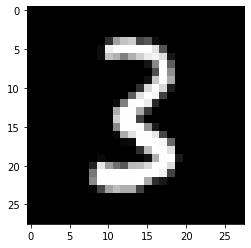

true label : 3 
 predicted label 3


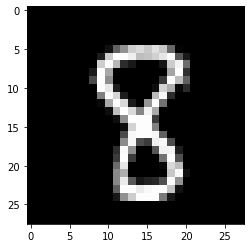

true label : 8 
 predicted label 8


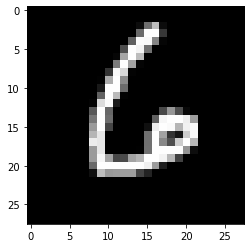

true label : 6 
 predicted label 6


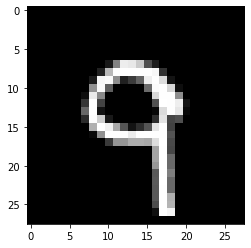

true label : 9 
 predicted label 9


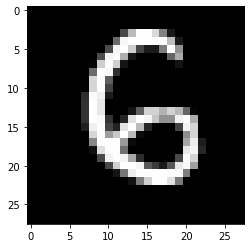

true label : 6 
 predicted label 6


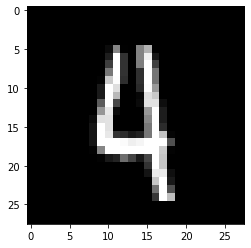

true label : 4 
 predicted label 9


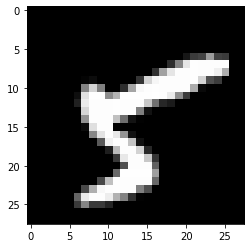

true label : 5 
 predicted label 5


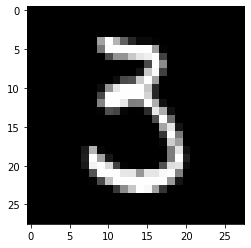

true label : 3 
 predicted label 3


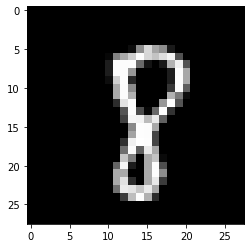

true label : 8 
 predicted label 8


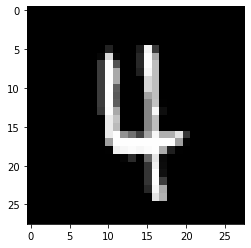

true label : 4 
 predicted label 4


In [16]:
for i in range(10):
    result = digits.predict(data2.test_x[i], data2.test_y[i])
    view_digit(data2.test_x[i])
    plt.show()
    print("true label :", data2.test_y[i], "\n predicted label", int(result[0][0]))